In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = "subset_0_of_S1A_IW_GRDH_1SDV_20241218T111533_20241218T111558_057045_0702CD_EA83_Orb_tnr_Cal_Spk_TC.tif"
with rasterio.open(image_path) as src:
    bands = [src.read(i) for i in range(1, src.count + 1)]

In [3]:
bands

[array([[0.03057691, 0.03172101, 0.02699716, ..., 0.        , 0.        ,
         0.        ],
        [0.01992182, 0.02959722, 0.03170092, ..., 0.        , 0.        ,
         0.        ],
        [0.02092949, 0.02404366, 0.0345832 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.03454497, 0.02783423, 0.03114014, ..., 0.01456263, 0.01526469,
         0.01290854],
        [0.03172189, 0.02631744, 0.02951808, ..., 0.01223122, 0.01157936,
         0.01035817],
        [0.0458142 , 0.0293069 , 0.031121  , ..., 0.01410218, 0.00922952,
         0.00894635]], dtype=float32),
 array([[0.15222424, 0.13563855, 0.14072597, ..., 0.        , 0.        ,
         0.        ],
        [0.14058071, 0.11524928, 0.18043147, ..., 0.        , 0.        ,
         0.        ],
        [0.1069188 , 0.10178103, 0.21106933, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.10293628, 0.09787936, 0.10861637, ..., 0.05680874, 0.05130996,
         0.05486946

In [4]:
flattened_bands = [band.flatten() for band in bands]
band_names = ["Sigma0_VH","Sigma0_VV", "Sigma0_VV_db"]

In [5]:
flattened_bands

[array([0.03057691, 0.03172101, 0.02699716, ..., 0.01410218, 0.00922952,
        0.00894635], dtype=float32),
 array([0.15222424, 0.13563855, 0.14072597, ..., 0.05978167, 0.05369902,
        0.05839751], dtype=float32),
 array([ -8.175161,  -8.676168,  -8.516257, ..., -12.23432 , -12.700336,
        -12.336057], dtype=float32)]

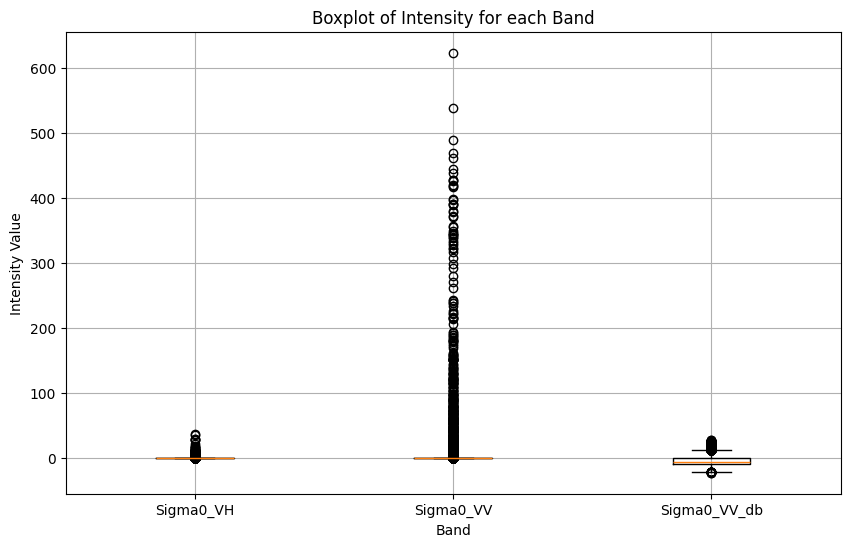

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(flattened_bands, tick_labels= band_names)
plt.title("Boxplot of Intensity for each Band")
plt.xlabel("Band")
plt.ylabel("Intensity Value")
plt.grid(True)
plt.show()

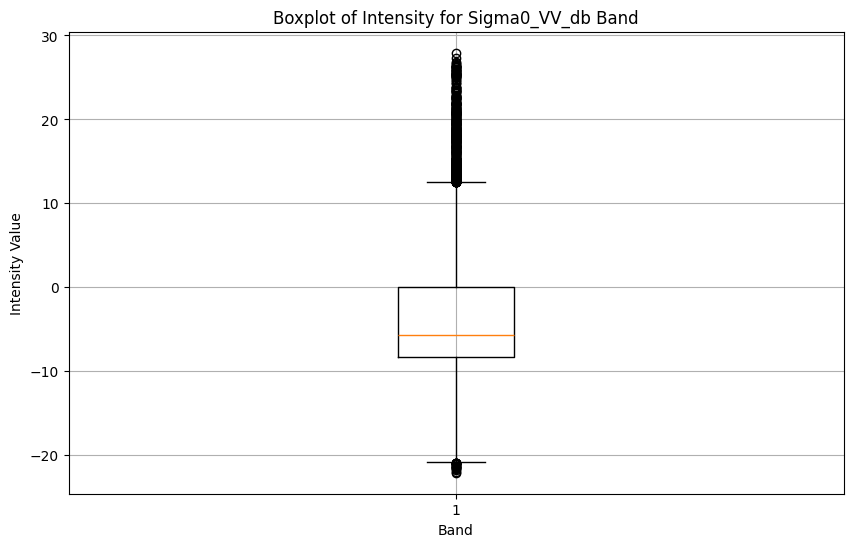

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(flattened_bands[2])
plt.title("Boxplot of Intensity for Sigma0_VV_db Band")
plt.xlabel("Band")
plt.ylabel("Intensity Value")
plt.grid(True)
plt.show()

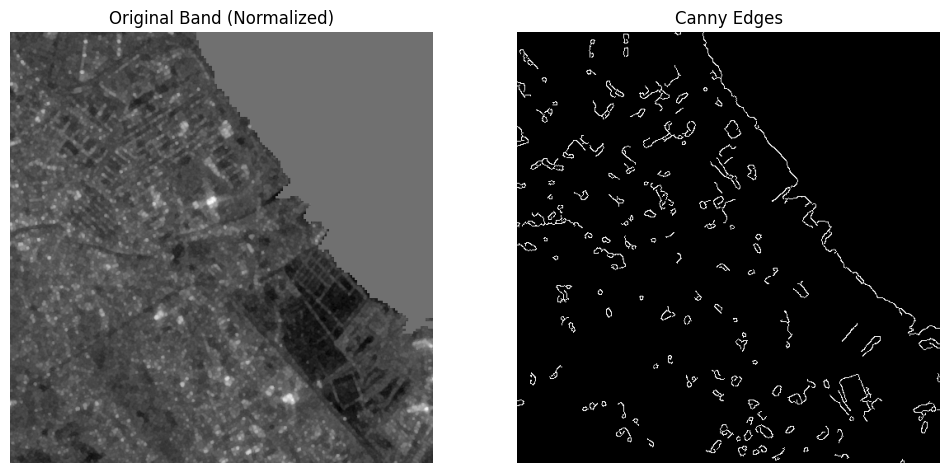

In [9]:
import rasterio
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Path to your preprocessed Sentinel-1 AOI TIFF
image_path = "subset_0_of_S1A_IW_GRDH_1SDV_20241218T111533_20241218T111558_057045_0702CD_EA83_Orb_tnr_Cal_Spk_TC.tif"

with rasterio.open(image_path) as src:
    band1 = src.read(3)  # shape (height, width)

# Sentinel-1 data is often in float32 and in dB after calibration
# Normalize to 0-255 and convert to uint8 for Canny edge detector
band1_min = np.min(band1)
band1_max = np.max(band1)
band1_norm = ((band1 - band1_min) / (band1_max - band1_min) * 255).astype(np.uint8)

# Apply Gaussian blur to reduce noise (optional but recommended)
blurred = cv2.GaussianBlur(band1_norm, (5, 5), 1.5)

# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Band (Normalized)")
plt.imshow(band1_norm, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()
